# Cross validation
So far, we have train one model with one parameter setting. Ususally we want to compare different models. For example, we want to see if limiting the depth of the tree prevents overfitting. 

We don't want to use our test set for parameter optimization, so we can do yet another split, splitting the training data into a training set and validation set, and use the latter for paramater optimization. A more sophisticated way to do this is *cross validation*, here we split our data into N parts, for example `X1, X2, X3`. Then we use `X1+X2` for training and `X3` for validating, `X1+X3` for training and `X2` for validating and `X2+X3` for training and `X1` for validating.

### Exercise
- Why do we not want to use the test set for parameter optimization?
- What are advantages or disadvantages of cross validation over a single train-validation split?

Luckily, cross validation is really easy in scikit-learn and requires little coding, especially if we already have the pipeline as we had earlier. Let's make that pipeline again

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [2]:
pipe = Pipeline([
    ('scale', MinMaxScaler()),
    ('model', DecisionTreeClassifier(min_samples_leaf=2)) # Here leave out the parameter that we are going to tune!
])

Let's see what parameters we could in theory tune:

In [3]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', MinMaxScaler()),
  ('model', DecisionTreeClassifier(min_samples_leaf=2))],
 'verbose': False,
 'scale': MinMaxScaler(),
 'model': DecisionTreeClassifier(min_samples_leaf=2),
 'scale__clip': False,
 'scale__copy': True,
 'scale__feature_range': (0, 1),
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__random_state': None,
 'model__splitter': 'best'}

There are many parameters here, but the one we want to very is the tree depth: `model__max_depth`. We try out values ranging from 1 to 15 (which was the tree depth when we did not limit it).

We give all the parameters we want to tune, with a list of the possible values, in the `param_grid`. We can also indicate the evaluation metrics that we want to calculate.

In [4]:
model = GridSearchCV(estimator=pipe,
                     cv = 3,
                    param_grid = {
                        'model__max_depth': range(1,16)
                        
                    },
                    scoring = "f1")

In [5]:
# Read in our training data again
weather_train = pd.read_csv('data/weather_train.csv')
features = weather_train.columns[:-1]
X = weather_train[features]
y = weather_train['BASEL_BBQ_weather']

In [6]:
# Fit the model
model.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model',
                                        DecisionTreeClassifier(min_samples_leaf=2))]),
             param_grid={'model__max_depth': range(1, 16)}, scoring='f1')

We can inspect the results as follows:

In [7]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,0.022285,0.000923,0.005987,0.002823,2,{'model__max_depth': 2},0.697368,0.661290,0.684932,0.681197,0.014964,1
2,0.026251,0.000957,0.004665,0.000479,3,{'model__max_depth': 3},0.652778,0.633333,0.696970,0.661027,0.026626,2
0,0.015956,0.000828,0.005319,0.000472,1,{'model__max_depth': 1},0.684783,0.654545,0.630435,0.656588,0.022234,3
4,0.036580,0.003374,0.004322,0.000470,5,{'model__max_depth': 5},0.629371,0.625954,0.628571,0.627965,0.001459,4
5,0.039230,0.005298,0.004654,0.000468,6,{'model__max_depth': 6},0.652482,0.587302,0.606061,0.615281,0.027397,5
9,0.042220,0.000940,0.004656,0.000469,10,{'model__max_depth': 10},0.676056,0.504202,0.593750,0.591336,0.070180,6
6,0.040889,0.004883,0.004322,0.000470,7,{'model__max_depth': 7},0.622222,0.528926,0.611940,0.587696,0.041768,7
7,0.043552,0.004042,0.005317,0.000472,8,{'model__max_depth': 8},0.647887,0.555556,0.558140,0.587194,0.042930,8
8,0.043539,0.005988,0.004654,0.000470,9,{'model__max_depth': 9},0.657343,0.512821,0.558140,0.576101,0.060352,9
10,0.047870,0.003526,0.004653,0.000472,11,{'model__max_depth': 11},0.611940,0.515625,0.589147,0.572238,0.041098,10


This is a lot of information, but it basically tells us for each parameter, the scores for each cross validation splits. By default, this score is the mean accuracy but we could provide a different metric here.

We see that using max_tree_depth=2 gives the best mean performance, although the differences are small. We can plot the scores for each value of min_samples_leaf:

<ErrorbarContainer object of 3 artists>

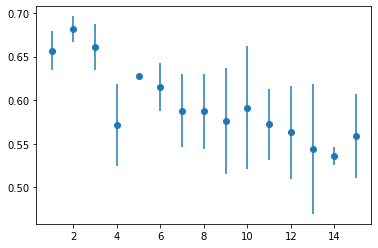

In [8]:
import matplotlib.pyplot as plt
plt.scatter(cv_results['param_model__max_depth'], cv_results['mean_test_score'])
plt.errorbar(cv_results['param_model__max_depth'], cv_results['mean_test_score'], yerr=cv_results['std_test_score'], fmt=' ')

There are many more parameters to experiment with, that also control the amount of overfitting.

### Exercise: different models
1. Look at the sklearn documentation and choose a different model. Create a pipeline, looping over different parameters. What do you find? Can you improve over the DecisionTree?

2. Create visualizations to understand the relationship between the parameter values and the model performance. What do you learn from the plots?

3. Apply your best model to the test set. Are you confident that the model works well on new data?

Bonus exercise:
Some machine learning models, such as Random Forests or Linear Regression, allow you to inspect the *feature importance*. Look into the scikit-learn documentation for one of these models and inspect the feature importance. Which feature is the most important to the model?

## Plotting different metrics
We select the final 'best' model and apply it to our test set. Apart from the f1 score, we can calculate and plot some other metrics.

In [9]:
weather_test = pd.read_csv('data/weather_test.csv')
X_test = weather_test[features]
y_test = weather_test['BASEL_BBQ_weather']

In [10]:
best_model = model.best_estimator_
y_predicted = best_model.predict(X_test)

In [11]:
import sklearn.metrics

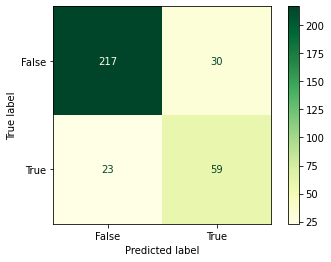

In [12]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='YlGn')

We can get a more extensive report on precision, recall and f1:

In [13]:
print(sklearn.metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

       False       0.90      0.88      0.89       247
        True       0.66      0.72      0.69        82

    accuracy                           0.84       329
   macro avg       0.78      0.80      0.79       329
weighted avg       0.84      0.84      0.84       329



In [14]:
y_scores = best_model.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_scores)

Optional: this does not give us the f1 scores, we can manually calculate them

In [15]:
f1 = 2*(precisions*recalls)/(precisions+recalls)

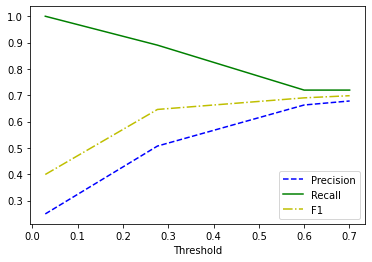

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.plot(thresholds, f1[:-1], "y-.", label="F1")
plt.xlabel('Threshold')
plt.legend()
plt.legend(loc="lower right")
plt.show()

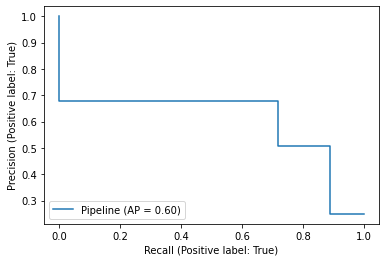

In [17]:
sklearn.metrics.PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test)

**Exercise**:
Look at the documentation of [model evaluation in scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#). Are there other metrics than f1 that make sense to calculate for this problem? Apply this metric and explain how you interpret it.